# 3-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from category_encoders import *
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from scipy import stats
import pickle

In [2]:
df = pd.read_csv("Week 3 Data/BUYTEST.csv")
df

,ID,RESPOND,AGE,INCOME,SEX,MARRIED,FICO,OWNHOME,LOC,CLIMATE,...,RETURN24,COA6,C1,C2,C3,C4,C5,C6,C7,PURCHTOT
0,1371057,0,71,67,M,1,719,0,A,10,...,0,0,0,0,0,0,0,0,0,0
1,2093270,0,53,72,M,1,751,0,A,10,...,0,0,0,0,0,0,0,0,0,0
2,2783726,0,53,70,F,1,725,0,A,10,...,0,0,0,0,0,0,0,0,0,0
3,10800860,0,45,56,F,0,684,0,A,10,...,0,0,0,0,0,0,0,0,0,0
4,14577797,0,32,66,F,0,651,0,A,10,...,0,0,0,0,0,0,0,0,0,0
5,15884859,0,35,48,F,0,691,1,A,10,...,1,0,0,0,0,0,0,0,0,0
6,17131376,0,43,49,F,0,694,1,A,10,...,1,0,0,0,0,0,0,0,0,0
7,18674857,0,39,64,M,0,659,0,A,10,...,0,0,0,0,0,0,0,0,0,0
8,19417226,0,66,65,M,0,692,0,A,10,...,0,0,0,0,0,0,0,0,0,0
9,21786286,0,$null$,$null$,NaN,$null$,707,$null$,A,10,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['ID', 'RESPOND', 'AGE', 'INCOME', 'SEX', 'MARRIED', 'FICO', 'OWNHOME',
       'LOC', 'CLIMATE', 'BUY6', 'BUY12', 'BUY18', 'BUY24', 'ORGSRC',
       'DISCBUY', 'RETURN24', 'COA6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'PURCHTOT'],
      dtype='object')

In [4]:
df.describe()

,RESPOND,CLIMATE,BUY6,BUY12,BUY18,BUY24,DISCBUY,RETURN24,COA6,C1,C2,C3,C4,C5,C6,C7,PURCHTOT
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.076700,20.343000,0.128300,0.209900,0.347100,254.045100,0.270000,0.070900,0.028900,0.155300,1.01220,0.563500,0.53730,0.35400,3.491600,0.174500,6.288400
std,0.266128,6.108689,0.346195,0.436648,0.570661,153.422061,0.443982,0.256671,0.167534,1.488087,6.28347,4.240303,4.54936,2.92789,15.493222,1.863437,27.276327
min,0.000000,10.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,149.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,20.000000,0.000000,0.000000,0.000000,214.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,20.000000,0.000000,0.000000,1.000000,312.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
max,1.000000,30.000000,2.000000,3.000000,3.000000,1253.000000,1.000000,1.000000,1.000000,46.000000,115.00000,127.000000,125.00000,90.00000,249.000000,62.000000,446.000000


In [5]:
#Converting strange null to np null
compare_str = df['AGE'][9]
for col in df.columns:
    df.loc[df[col] == compare_str, col] = np.nan

/Users/danielhan/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
df.isnull().sum()

ID            0
RESPOND       0
AGE         234
INCOME      234
SEX         234
MARRIED     234
FICO         39
OWNHOME     234
LOC           0
CLIMATE       0
BUY6          0
BUY12         0
BUY18         0
BUY24         0
ORGSRC      521
DISCBUY       0
RETURN24      0
COA6          0
C1            0
C2            0
C3            0
C4            0
C5            0
C6            0
C7            0
PURCHTOT      0
dtype: int64

In [7]:
df.dtypes

ID           object
RESPOND     float64
AGE          object
INCOME       object
SEX          object
MARRIED      object
FICO         object
OWNHOME      object
LOC          object
CLIMATE     float64
BUY6        float64
BUY12       float64
BUY18       float64
BUY24       float64
ORGSRC       object
DISCBUY     float64
RETURN24    float64
COA6        float64
C1          float64
C2          float64
C3          float64
C4          float64
C5          float64
C6          float64
C7          float64
PURCHTOT    float64
dtype: object

In [8]:
#Type conversion of columns
df[['AGE','INCOME','MARRIED','FICO','OWNHOME']] = df[['AGE','INCOME','MARRIED','FICO','OWNHOME']].apply(pd.to_numeric)


In [9]:
df.dtypes

ID           object
RESPOND     float64
AGE         float64
INCOME      float64
SEX          object
MARRIED     float64
FICO        float64
OWNHOME     float64
LOC          object
CLIMATE     float64
BUY6        float64
BUY12       float64
BUY18       float64
BUY24       float64
ORGSRC       object
DISCBUY     float64
RETURN24    float64
COA6        float64
C1          float64
C2          float64
C3          float64
C4          float64
C5          float64
C6          float64
C7          float64
PURCHTOT    float64
dtype: object

In [10]:
df

,ID,RESPOND,AGE,INCOME,SEX,MARRIED,FICO,OWNHOME,LOC,CLIMATE,...,RETURN24,COA6,C1,C2,C3,C4,C5,C6,C7,PURCHTOT
0,1371057,0.0,71.0,67.0,M,1.0,719.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2093270,0.0,53.0,72.0,M,1.0,751.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2783726,0.0,53.0,70.0,F,1.0,725.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10800860,0.0,45.0,56.0,F,0.0,684.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14577797,0.0,32.0,66.0,F,0.0,651.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15884859,0.0,35.0,48.0,F,0.0,691.0,1.0,A,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17131376,0.0,43.0,49.0,F,0.0,694.0,1.0,A,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,18674857,0.0,39.0,64.0,M,0.0,659.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,19417226,0.0,66.0,65.0,M,0.0,692.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,21786286,0.0,NaN,NaN,NaN,NaN,707.0,NaN,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Missing Value treatment
df['AGE'].fillna(df['AGE'].mean(),inplace=True)
df['FICO'].fillna(df['FICO'].mean(),inplace=True)
df['INCOME'].fillna(df['INCOME'].mean(),inplace=True)
df['SEX'].fillna(df['SEX'].value_counts().idxmax(),inplace=True)
df['MARRIED'].fillna(df['MARRIED'].value_counts().idxmax(),inplace=True)
df['OWNHOME'].fillna(df['OWNHOME'].value_counts().idxmax(),inplace=True)
df['ORGSRC'].fillna(df['ORGSRC'].value_counts().idxmax(),inplace=True)

In [12]:
df

,ID,RESPOND,AGE,INCOME,SEX,MARRIED,FICO,OWNHOME,LOC,CLIMATE,...,RETURN24,COA6,C1,C2,C3,C4,C5,C6,C7,PURCHTOT
0,1371057,0.0,71.000000,67.000000,M,1.0,719.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2093270,0.0,53.000000,72.000000,M,1.0,751.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2783726,0.0,53.000000,70.000000,F,1.0,725.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10800860,0.0,45.000000,56.000000,F,0.0,684.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14577797,0.0,32.000000,66.000000,F,0.0,651.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15884859,0.0,35.000000,48.000000,F,0.0,691.0,1.0,A,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17131376,0.0,43.000000,49.000000,F,0.0,694.0,1.0,A,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,18674857,0.0,39.000000,64.000000,M,0.0,659.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,19417226,0.0,66.000000,65.000000,M,0.0,692.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,21786286,0.0,44.557342,47.952181,M,1.0,707.0,0.0,A,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Categorical Encoder
enc = BinaryEncoder(cols=['SEX', 'LOC','ORGSRC']).fit(df)
enc_df = enc.transform(df)

In [14]:
enc_df.describe()

,SEX_0,SEX_1,LOC_0,LOC_1,LOC_2,LOC_3,ORGSRC_0,ORGSRC_1,ORGSRC_2,ORGSRC_3,...,RETURN24,COA6,C1,C2,C3,C4,C5,C6,C7,PURCHTOT
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.448900,0.551100,0.109300,0.593300,0.550700,0.435700,0.0,0.449500,0.452500,0.607300,...,0.070900,0.028900,0.155300,1.01220,0.563500,0.53730,0.35400,3.491600,0.174500,6.288400
std,0.497407,0.497407,0.312031,0.491243,0.497448,0.495873,0.0,0.497468,0.497764,0.488375,...,0.256671,0.167534,1.488087,6.28347,4.240303,4.54936,2.92789,15.493222,1.863437,27.276327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,46.000000,115.00000,127.000000,125.00000,90.00000,249.000000,62.000000,446.000000


In [15]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,RESPOND,AGE,INCOME,MARRIED,FICO,OWNHOME,CLIMATE,BUY6,BUY12,BUY18,BUY24,DISCBUY,RETURN24,COA6,C1,C2,C3,C4,C5,C6,C7,PURCHTOT
RESPOND,1,-0.0698882,-0.0126651,0.0332686,-0.0405683,-0.0563212,-0.0334094,0.0201838,0.0335707,0.0887527,0.0621357,-0.00938683,-0.0078774,0.022058,0.362108,0.558936,0.461097,0.409791,0.419512,0.781949,0.32492,0.799926
AGE,-0.0698882,1,-0.00613149,0.396385,-0.00629976,0.0239059,-0.0154439,-0.0160693,-0.0219667,-0.0296008,-0.02555,-0.00553689,0.00823972,-0.085926,0.00109807,0.0450106,-0.0707473,-0.0801886,-0.043136,-0.0570701,-0.0401111,-0.0537309
INCOME,-0.0126651,-0.00613149,1,-0.0122336,-0.00407218,0.146374,-0.0592711,-0.00647164,-0.00443293,-0.00564303,-0.0493245,0.0129936,0.006533,0.0137172,-0.0149595,0.0994481,-0.112934,-0.104869,-0.103895,0.0126632,-0.0807854,-0.0224326
MARRIED,0.0332686,0.396385,-0.0122336,1,0.0159723,-0.0147207,-0.000902612,0.0317785,0.0412277,0.0440955,0.0577658,-0.0217997,0.00549397,-0.0372386,0.0199343,0.0522265,0.0133204,0.00528067,0.0209062,0.0349402,0.0159158,0.0392479
FICO,-0.0405683,-0.00629976,-0.00407218,0.0159723,1,0.00938159,0.0147733,0.00791112,-0.00141952,-0.0135261,-0.0308231,-0.00694623,0.00929043,0.00510135,-0.0178259,-0.0400309,-0.00902653,-0.0067264,-0.00986183,-0.0458215,-0.0315077,-0.0419575
OWNHOME,-0.0563212,0.0239059,0.146374,-0.0147207,0.00938159,1,-0.0296515,-0.0231922,-0.0229116,-0.0323635,-0.0565485,0.00479933,0.00802194,-0.028392,-0.0300636,-0.0197497,-0.0310714,-0.0232177,-0.0290743,-0.0441106,-0.0363298,-0.0455505
CLIMATE,-0.0334094,-0.0154439,-0.0592711,-0.000902612,0.0147733,-0.0296515,1,0.0141839,0.023623,0.0166238,0.198755,0.0119438,-0.0116846,-0.00186913,-0.00101964,0.0186247,0.0119968,-0.0189397,0.0307305,-0.0101086,0.0502676,0.00393191
BUY6,0.0201838,-0.0160693,-0.00647164,0.0317785,0.00791112,-0.0231922,0.0141839,1,0.779158,0.606798,0.387668,0.00233589,0.0214243,0.0102103,0.00092214,-0.00242071,0.00190959,0.0121059,-0.0088979,0.00985014,0.0128853,0.00732878
BUY12,0.0335707,-0.0219667,-0.00443293,0.0412277,-0.00141952,-0.0229116,0.023623,0.779158,1,0.779617,0.508523,0.0156156,0.0180085,0.0141346,0.00492921,0.00599231,0.0144876,0.0215584,0.00555053,0.0178749,0.019878,0.0196042
BUY18,0.0887527,-0.0296008,-0.00564303,0.0440955,-0.0135261,-0.0323635,0.0166238,0.606798,0.779617,1,0.65464,0.0248009,0.0081294,0.0143188,0.028495,0.0432215,0.0326134,0.0267744,0.030004,0.0744376,0.0621951,0.0707978


In [16]:
enc_df.drop(['ID','C1','C2','C3','C4','C5','C6','C7','PURCHTOT'],axis=1,inplace=True)

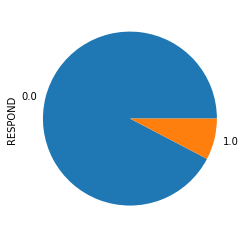

In [17]:
#pie chart
pd.value_counts(enc_df['RESPOND']).plot.pie()

In [18]:
#partitioning
train, test = train_test_split(enc_df,test_size=0.3)

In [19]:
train.columns

Index(['SEX_0', 'SEX_1', 'LOC_0', 'LOC_1', 'LOC_2', 'LOC_3', 'ORGSRC_0',
       'ORGSRC_1', 'ORGSRC_2', 'ORGSRC_3', 'RESPOND', 'AGE', 'INCOME',
       'MARRIED', 'FICO', 'OWNHOME', 'CLIMATE', 'BUY6', 'BUY12', 'BUY18',
       'BUY24', 'DISCBUY', 'RETURN24', 'COA6'],
      dtype='object')

In [20]:
X_train = train.loc[:,enc_df.columns != 'RESPOND'].values
y_train = train.loc[:,enc_df.columns == 'RESPOND'].values
X_test = test.loc[:,enc_df.columns != 'RESPOND'].values
y_test = test.loc[:,enc_df.columns == 'RESPOND'].values

In [21]:
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train,y_train.ravel())

In [56]:
import math

In [62]:
len(X_res)

12898

In [22]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_res,y_res)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
cm = confusion_matrix(y_test,y_pred)

In [25]:
cm

array([[2547,  237],
       [ 181,   35]])

In [26]:
abs(((cm[0][1]+cm[1][0])/(cm[0][0]+cm[1][1]))-1)

0.8381099922540667

In [27]:
classifier2 = DecisionTreeClassifier(criterion='gini',random_state=0)
classifier2.fit(X_res,y_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [28]:
y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred2)
cm2

array([[2496,  288],
       [ 177,   39]])

In [29]:
abs(((cm2[0][1]+cm2[1][0])/(cm2[0][0]+cm2[1][1]))-1)

0.8165680473372781

# 3-2

In [30]:
df = pd.read_excel('Week 3 Data/CallsData.xls')
df2 = pd.read_csv('Week 3 Data/ContractData.csv')

In [31]:
df2

,Account Length,Churn,Int'l Plan,VMail Plan,State,Area Code,Phone
0,128,0,0,1,KS,415,382-4657
1,107,0,0,1,OH,415,371-7191
2,137,0,0,0,NJ,415,358-1921
3,84,0,1,0,OH,408,375-9999
4,75,0,1,0,OK,415,330-6626
5,118,0,1,0,AL,510,391-8027
6,121,0,0,1,MA,510,355-9993
7,147,0,1,0,MO,415,329-9001
8,117,0,0,0,LA,408,335-4719
9,141,0,1,1,WV,415,330-8173


In [32]:
#inner join (join on index should be used by pd.join(how='inner'))
df = pd.merge(df,df2,on=['Area Code','Phone'])

In [33]:
df.describe()

,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code,Account Length,Churn,Int'l Plan,VMail Plan
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418,101.064806,0.144914,0.096910,0.276628
std,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290,39.822106,0.352067,0.295879,0.447398
min,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000,74.000000,0.000000,0.000000,0.000000
50%,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000,101.000000,0.000000,0.000000,0.000000
75%,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000,127.000000,0.000000,0.000000,1.000000
max,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000,243.000000,1.000000,1.000000,1.000000


In [34]:
#column filter
df.drop(['Phone','Account Length'],axis=1,inplace=True)

In [35]:
#number to string(categorical)
print(df['Churn'].unique()) #its binary, so we dont have to encode this one.
print(df['Area Code'].unique())
print(df['State'].unique())

[0 1]
[415 408 510]
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


In [36]:
enc = BinaryEncoder(cols=['Area Code','State']).fit(df)
enc_df = enc.transform(df)

In [37]:
enc_df.describe()

,Area Code_0,Area Code_1,Area Code_2,State_0,State_1,State_2,State_3,State_4,State_5,State_6,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Churn,Int'l Plan,VMail Plan
count,3333.0,3333.000000,3333.000000,3333.0,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.0,0.503450,0.748575,0.0,0.382838,0.373537,0.461446,0.452745,0.519052,0.501050,...,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,0.144914,0.096910,0.276628
std,0.0,0.500063,0.433897,0.0,0.486152,0.483815,0.498586,0.497837,0.499712,0.500074,...,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,0.352067,0.295879,0.447398
min,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,0.000000,0.000000,0.000000
50%,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,0.000000,0.000000,0.000000
75%,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,0.000000,0.000000,1.000000
max,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,1.000000,1.000000,1.000000


In [38]:
enc_df.describe()

,Area Code_0,Area Code_1,Area Code_2,State_0,State_1,State_2,State_3,State_4,State_5,State_6,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Churn,Int'l Plan,VMail Plan
count,3333.0,3333.000000,3333.000000,3333.0,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.0,0.503450,0.748575,0.0,0.382838,0.373537,0.461446,0.452745,0.519052,0.501050,...,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,0.144914,0.096910,0.276628
std,0.0,0.500063,0.433897,0.0,0.486152,0.483815,0.498586,0.497837,0.499712,0.500074,...,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,0.352067,0.295879,0.447398
min,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,0.000000,0.000000,0.000000
50%,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,0.000000,0.000000,0.000000
75%,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,0.000000,0.000000,1.000000
max,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,1.000000,1.000000,1.000000


In [39]:
#normalize using z-score
enc_df = enc_df.apply(lambda x: x if np.std(x) == 0 or x.name == 'Churn' or 'Area Code' in x.name or 'State' in x.name else stats.zscore(x))

In [40]:
#Partition
X = enc_df.loc[:,enc_df.columns != 'Churn'].values
y = enc_df.loc[:,enc_df.columns == 'Churn'].values.ravel()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [42]:
#Oversampling
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [43]:
len(X_train_res)

4550

In [44]:
classifier = DecisionTreeClassifier(criterion='gini',min_samples_split=6)
classifier.fit(X_train_res,y_train_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[544,  31],
       [ 14,  78]])

In [46]:
print('Accuracy:',abs(((cm[0][1]+cm[1][0])/(cm[0][0]+cm[1][1]))-1))

Accuracy: 0.927652733118971


In [47]:
DT_classifier = pickle.dumps(classifier)